# Correlation and Autocorrelation in Time Series - Lab

## Introduction

In this lab, You'll practice your knowledge on correlation, autocorrelation and the ACF and PACF.

## Objectives

You will be able to:
- Understand correlation in Time Series
- Plot and discuss the autocorrelation function (ACF) for a time-series 
- Plot and discuss the partial autocorrelation function (PACF) for a time-series 
- Interpret ACF and PACF and Identify use cases both functions

## The Exchange Rate Data

We'll be looking at the exchange rates dataset again. First, import the necessary libraries for time series and plotting. Then import the data (in `exch_rates.csv`) and make sure it's set in the correct time series format with the `datetime` as the index.

In [1]:
# your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

In [3]:
# your code here
data = pd.read_csv('exch_rates.csv')
data.head()

,Frequency,Euro,Australian Dollar,Danish Krone
0,2000-01-01,NaN,NaN,NaN
1,2000-01-02,NaN,NaN,NaN
2,2000-01-03,0.991080,1.520912,7.374034
3,2000-01-04,0.970403,1.521300,7.222610
4,2000-01-05,0.964506,1.521316,7.180170


In [4]:
data.Frequency = pd.to_datetime(data.Frequency)
data.set_index('Frequency', inplace=True)
data.head()

,Euro,Australian Dollar,Danish Krone
Frequency,,,
2000-01-01,NaN,NaN,NaN
2000-01-02,NaN,NaN,NaN
2000-01-03,0.991080,1.520912,7.374034
2000-01-04,0.970403,1.521300,7.222610
2000-01-05,0.964506,1.521316,7.180170


Plot the three exchange rates in one plot

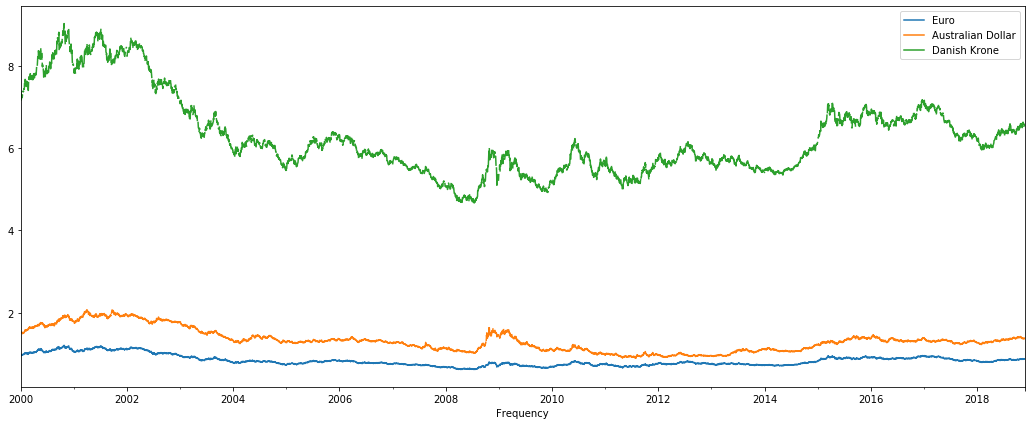

In [19]:
# your code here
data.plot(figsize=(18,7))

You can see that the EUR/USD and AUD/USD exchange rate are somewhere between rougly 0.5 and 2 between 2000 and 2018, where the Danish Krone is somewhere between roughly 4.5 and 9. Now let's look at the correlations between these time series.

In [20]:
# your code here
data.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.883181,0.999952
Australian Dollar,0.883181,1.000000,0.882513
Danish Krone,0.999952,0.882513,1.000000


### What is your conclusion here? You might want to use outside resources to understand what's going on.

Euro and Danish Krone are perfectly correlated.

Next, look at the plots of the differenced series. Use subplots to plot them rather than creating just one plot.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c2a55d978>,
      dtype=object)

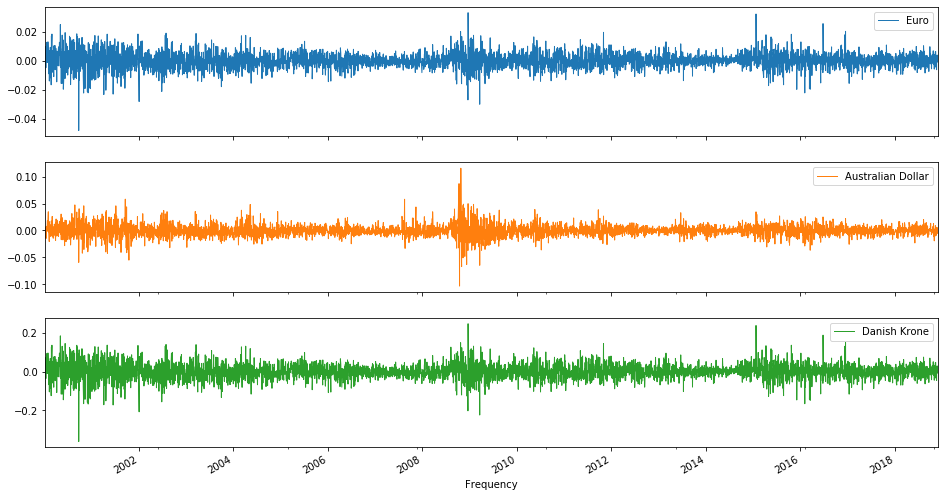

In [28]:
# your code here
data.dropna(inplace=True)
data_dif = data.diff()
data_dif.plot(figsize=(16,9),lw=1,subplots=True)

In [29]:
# your code here
data_dif.corr()

,Euro,Australian Dollar,Danish Krone
Euro,1.000000,0.551734,0.999688
Australian Dollar,0.551734,1.000000,0.551566
Danish Krone,0.999688,0.551566,1.000000


### Explain what's going on

Since the high relation in our un-differenced data is partly due to seasonality, differencing led to a decrease in Euro-AusDollar correlation.

Next, let's look at the "lag 1 autocorrelation" for the EUR/USD exchange rate. Create a "lag 1 autocorrelation" series, plot the result, and look at the correlation coefficient.

In [33]:
# your code here
euro = data.Euro
euro_shift = euro.shift(1)

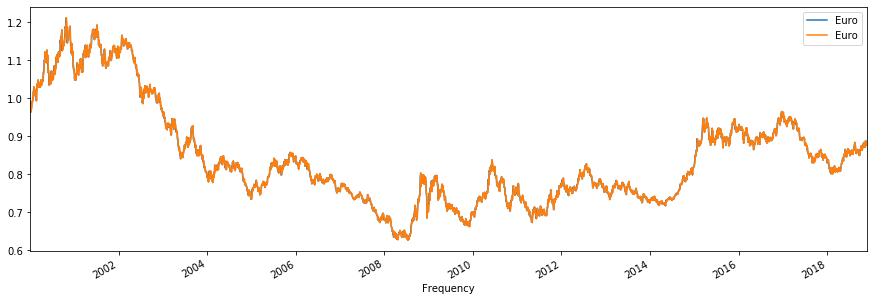

In [42]:
auto_euro = pd.concat([euro, euro_shift], axis=1)
auto_euro.plot(figsize=(15,5))

In [43]:
auto_euro.corr()

,Euro,Euro
Euro,1.000000,0.999119
Euro,0.999119,1.000000


Repeat this, but for a "lag 5 autocorrelation"

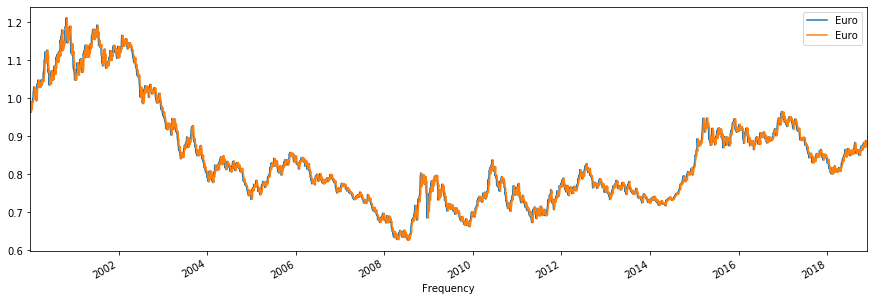

In [44]:
# your code here
euro = data.Euro
euro_shift = euro.shift(5)
auto_euro = pd.concat([euro, euro_shift], axis=1)
auto_euro.plot(figsize=(15,5))

In [45]:
# your code here
auto_euro.corr()

,Euro,Euro
Euro,1.000000,0.995738
Euro,0.995738,1.000000


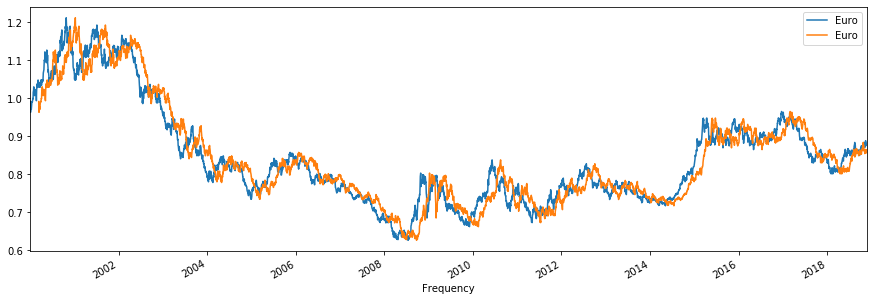

In [46]:
euro = data.Euro
euro_shift = euro.shift(50)
auto_euro = pd.concat([euro, euro_shift], axis=1)
auto_euro.plot(figsize=(15,5))

In [47]:
auto_euro.corr()

,Euro,Euro
Euro,1.000000,0.955217
Euro,0.955217,1.000000


### What's your conclusion here?

Autocorrelation is high in all three cases. This is not surprising since it is a random walk series, the value of the current one depends on the previous one.

Knowing this, let's plot the ACF now.

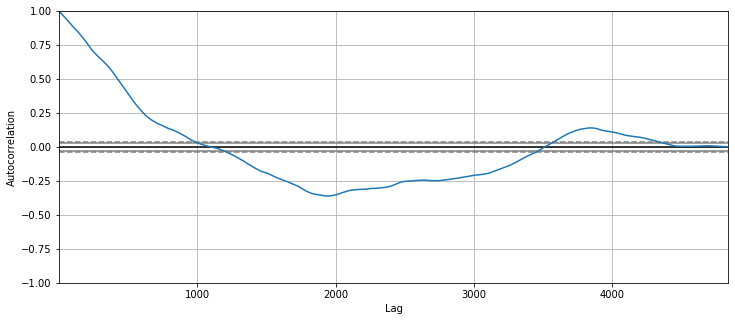

In [48]:
# your code here
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(euro);

The series is heavily autocorrelated at first, and then there is a decay. This is a typical result for a series that is a random walk, generally you'll see heavy autocorrelations first, slowly tailing off until there is no autocorrelation anymore.

Next, let's look at the Partial Autocorrelation Function.

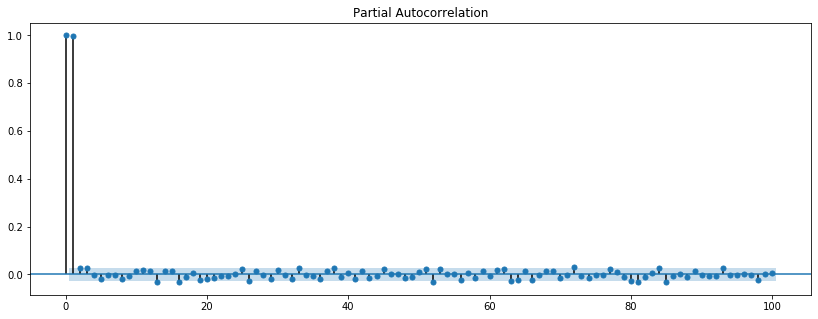

In [50]:
# your code here
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(euro, lags = 100, method='ywm');

This is interesting! Remember that *Partial Autocorrelation Function* gives the partial correlation of a time series with its own lagged values, controlling for the values of the time series at all shorter lags. When controlling for 1 period lags, the PACF is only very high for one-period lags, and basically 0 for shorter lags. This is again a typical result for Random Walk series!

## The Airpassenger Data

Look at ACF and PACF for the airpassenger data and describe the result `passengers.csv`. Do this both for the differenced and regular series.

In [51]:
# your code here
airp = pd.read_csv('passengers.csv')
airp.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [52]:
# your code here
airp.Month = pd.to_datetime(airp.Month)
airp.set_index('Month', inplace=True)
airp.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## No Differencing

Text(0.5, 1.0, 'Original Data')

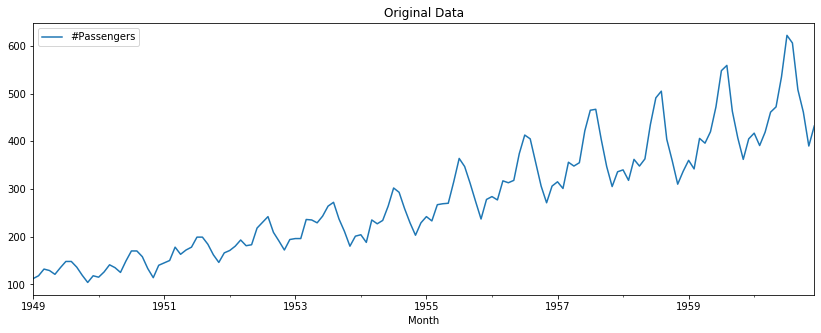

In [54]:
# your code here
airp.plot()
plt.title('Original Data')

             #Passengers  #Passengers
#Passengers     1.000000     0.960195
#Passengers     0.960195     1.000000


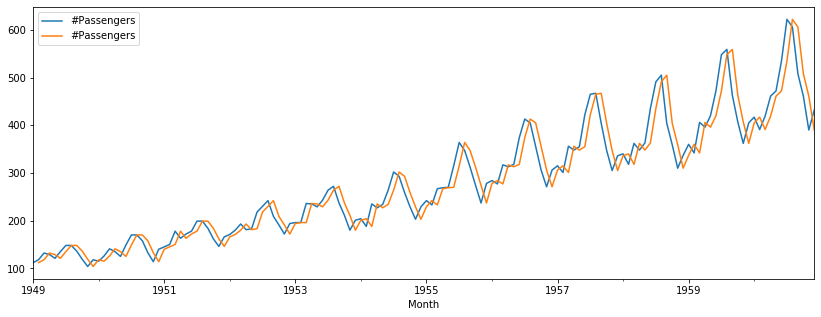

In [62]:
# your code here
airp_shift = airp.shift(1)
auto_airp = pd.concat([airp, airp_shift], axis=1)
print(auto_airp.corr())
auto_airp.plot()

Autocorrelation is very high with a shift of 1.

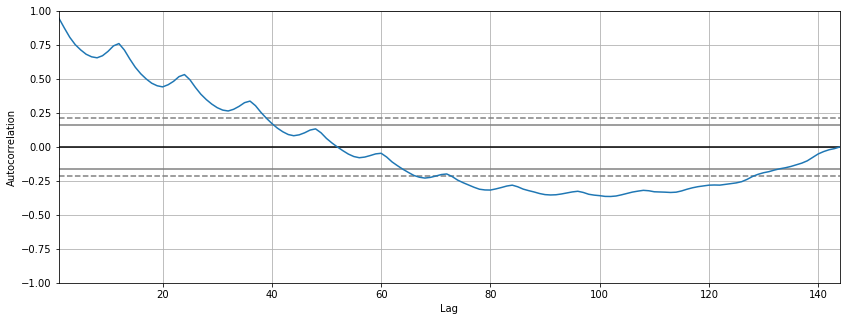

In [63]:
# your code here
pd.plotting.autocorrelation_plot(airp);

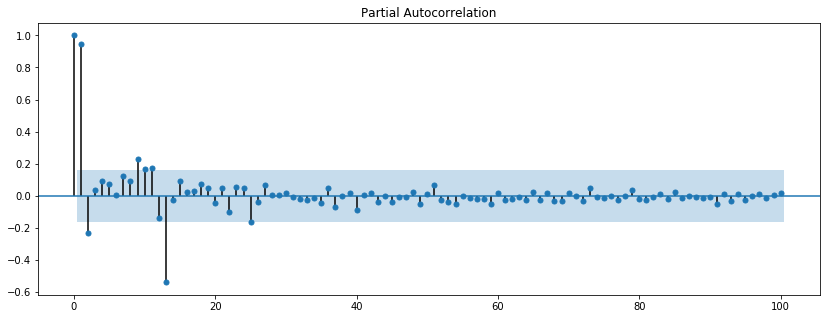

In [64]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(airp, lags = 100, method='ywm');

## Differencing

In [68]:
# your code here
airp_diff = airp.diff(periods=1)

In [69]:
airp_diff_shift = airp_diff.shift(1)
airp_auto = pd.concat([airp_diff, airp_diff_shift], axis=1)

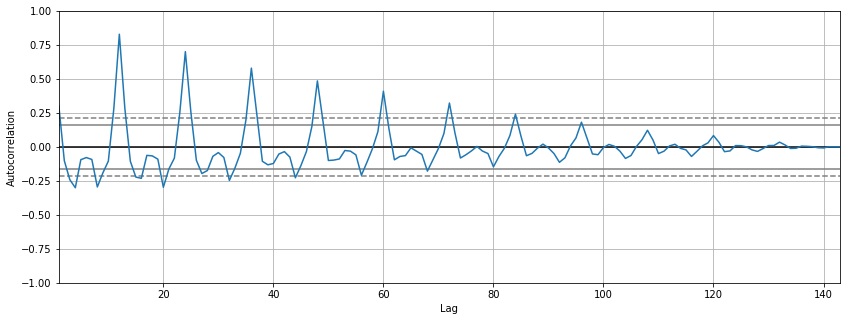

In [74]:
pd.plotting.autocorrelation_plot(airp_diff.dropna());

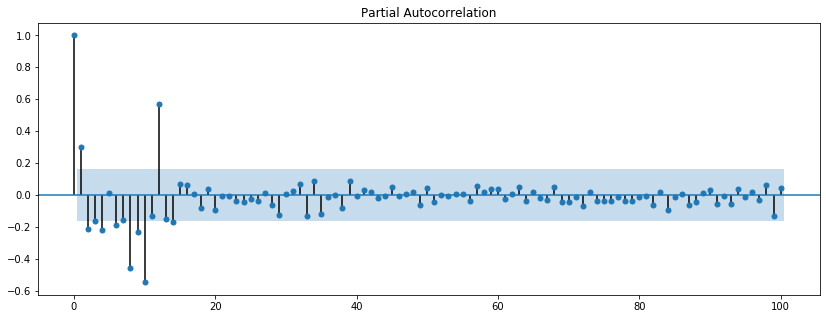

In [77]:
rcParams['figure.figsize'] = 14, 5

plot_pacf(airp_diff.dropna(), lags = 100, method='ywm');

### Your conclusion here

We see very strong seasonality in the differenced data.

## The NYSE data

Look at correlation and autocorrelation functions for the NYSE data ("NYSE_monthly.csv")

In [78]:
# your code here
nyse = pd.read_csv('NYSE_monthly.csv')
nyse.head()

,Month,monthly_return
0,1961-01,0.082
1,1961-02,0.059
2,1961-03,0.050
3,1961-04,0.008
4,1961-05,0.042


In [79]:
# your code here
nyse.Month = pd.to_datetime(nyse.Month)
nyse.set_index('Month', inplace=True)
nyse.head()

,monthly_return
Month,
1961-01-01,0.082
1961-02-01,0.059
1961-03-01,0.050
1961-04-01,0.008
1961-05-01,0.042


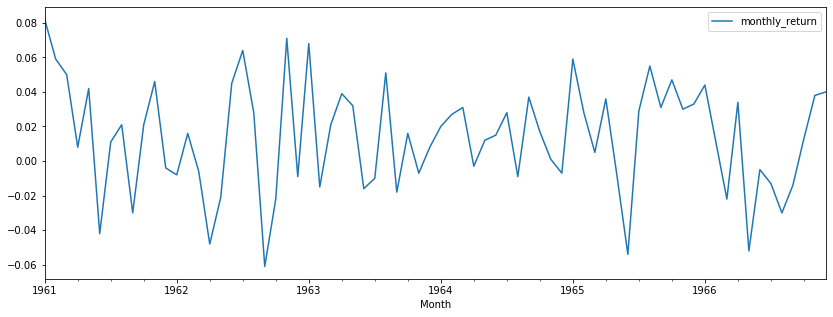

In [80]:
# your code here
nyse.plot()

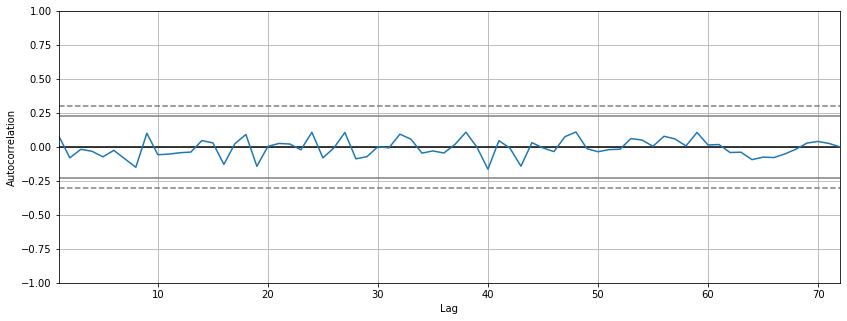

In [82]:
pd.plotting.autocorrelation_plot(nyse.dropna());

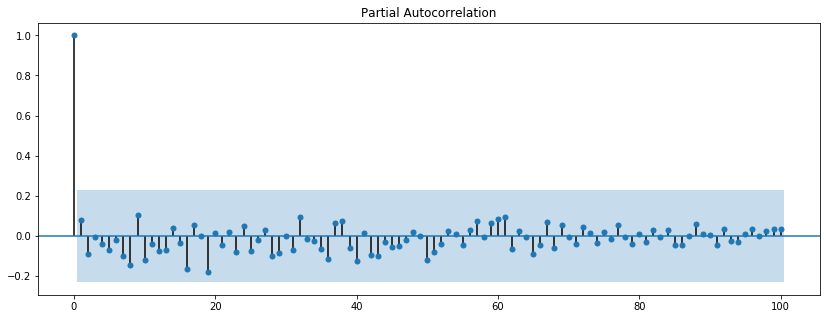

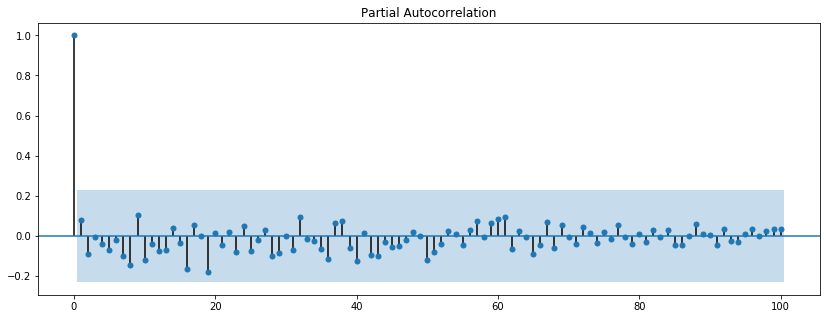

In [90]:
plot_pacf(nyse.dropna(), lags = 100, method='ywm')

## Your conclusion here

This dataset is very similar to white noise model -- no obvious trend or seasonality.



## Summary

Great, you've now been introduced to correlation, the ACF and PACF. Let's move into more serious modeling with autoregressive and moving average models!